# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [37]:
import os
import matplotlib.pyplot as plt
import numpy as np
c=0
trainX,trainY, testX, testY=[],[],[],[]
for dire in os.listdir('./ATnT'):
    if os.path.isdir(f'./ATnT/{dire}'):
        te =np.random.choice(range(1,10),2,replace=False)
        for img in os.listdir(f'./ATnT/{dire}'):
            if(int(img[:img.find('.')]) in te):
                testX.append(plt.imread(f'./ATnT/{dire}/{img}'))
                testY.append(int(dire[dire.find('s')+1:])-1)
            else:
                trainX.append(plt.imread(f'./ATnT/{dire}/{img}'))
                trainY.append(int(dire[dire.find('s')+1:])-1)

                
# data = sorted(data,key= lambda ind: ind[1])
trainX,trainY,testX,testY = np.array(trainX),np.array(trainY),np.array(testX),np.array(testY)
img_shape = trainX.shape[1:]
print(img_shape)
trainX.shape, trainY.shape, testX.shape, testY.shape


(112, 92)


((320, 112, 92), (320,), (80, 112, 92), (80,))

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [2]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def getpairs(X):
    if len(X.shape)==2:
        Cov =np.cov(X.T)
        eigVal,eigVec = np.linalg.eig(Cov)
        eighpairs =[[eigVal[i],eigVec[i]] for i in range(len(eigVal))]
        sorted(eighpairs, key=lambda ind: ind[0], reverse=True)
        eighpairs =np.array(eighpairs) 
    return eighpairs
def principalComponentAnalysis(eighpairs, number_of_components):
    return eighpairs[:number_of_components,0]
    
print(trainX.reshape(trainX.shape[0],-1).shape)
eigpairs = getpairs(trainX.reshape(trainX.shape[0],-1))
# print(x.shape)
# y.shape


(320, 10304)


/tmp/ipykernel_27826/4044872703.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eighpairs =np.array(eighpairs)


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [81]:
# Function to implement image reconstruction by taking arguements as necessary.
mean_face=(np.mean(trainX,axis=0)).reshape(-1)
# eigpairs[:,1]=eigpairs[:,1].view(np.float32)
print(eigpairs.shape, mean_face)
def imageReconstruction(image,eigenfaces,mean_face,num_components):
    image_flattened = image.flatten()
    print(image_flattened.shape)
    image_pca = eigenfaces.T @ (image_flattened - mean_face)
    reconstructed_image = mean_face + eigenfaces[:, :num_components] @ image_pca[:num_components]
    print(reconstructed_image.shape,np.array([np.real(x) for i,x in enumerate(reconstructed_image)]).shape)
    reconstructed_image =np.real(reconstructed_image)
    reconstructed_image = reconstructed_image.reshape(image.shape)
    return reconstructed_image

(10304, 2) [85.484375 85.371875 85.5625   ... 76.175    75.090625 75.028125]


#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

(10304,)
(10304,) (10304, 10304)


TypeError: Image data of dtype object cannot be converted to float

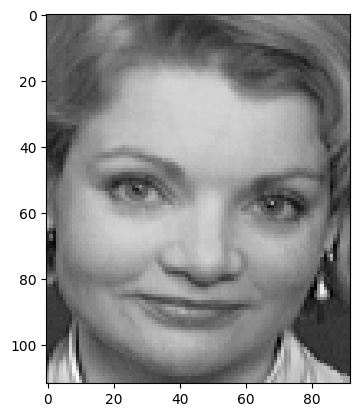

In [82]:
comp =[5,10,100,1000]
image =trainX[0]
plt.imshow(image,cmap='gray')
for c in comp:
    eigenfaces = principalComponentAnalysis(eigpairs,c)
    eigenfaces = np.expand_dims(eigpairs[:,1],axis=1)
#     print(.shape)
    y=imageReconstruction(image,eigenfaces,mean_face,c)
#     print(y)
    plt.imshow(y,cmap='gray')

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
# import numpy as np

# def model(test_image, eigenvectors, mean_face, X_train, y_train):
#     test_image_flattened = test_image.flatten()
#     test_image_pca = eigenvectors.T @ (test_image_flattened - mean_face)
#     X_train_flattened = X_train.reshape(X_train.shape[0], -1)
#     X_train_pca = eigenvectors.T @ (X_train_flattened - mean_face)
#     distances = np.linalg.norm(X_train_pca - test_image_pca, axis=1)
#     min_index = np.argmin(distances)
#     reconstructed_image = mean_face + eigenvectors @ X_train_pca[min_index]
#     error = np.linalg.norm(test_image_flattened - reconstructed_image)
#     return X_train[min_index], error, y_train[min_index]


In [ ]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

In [ ]:
# Plot Number of eigenvectors vs Mean Square Error

In [ ]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error

Summarise your observations on the plots and accuracies

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**